In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#store reuslt from different model 
model_result={}#empty dictionary 

In [4]:
td=pd.read_csv('tested.csv')
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
td=td[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


# Data Cleaning 

In [8]:
td.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [9]:
td.shape

(418, 8)

In [10]:
td['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

## as per the dataset the survived values in countplot bar plotting is below

<Axes: xlabel='Survived', ylabel='count'>

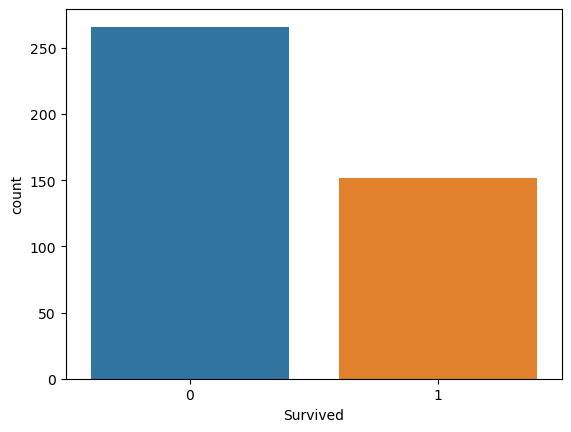

In [11]:
sns.countplot(x='Survived',data=td)

In [12]:
td['Age'].mean()

30.272590361445783

In [13]:
td['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [14]:
td['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [15]:
td['Age'].fillna(td['Age'].mean(),inplace=True)

In [16]:
td.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [17]:
td.dropna(inplace=True)

In [18]:
td.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    object 
 3   Age       417 non-null    float64
 4   SibSp     417 non-null    int64  
 5   Parch     417 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  417 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 29.3+ KB


In [20]:
td.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [21]:
#take dependent and independent seperatly 
td_X=td[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
td_Y=td[['Survived']]

In [22]:
td_Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  417 non-null    int64
dtypes: int64(1)
memory usage: 6.5 KB


# Splitting of Data

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(td_X,td_Y,test_size=0.2,random_state=42)

In [24]:
X_train.shape,X_test.shape

((333, 7), (84, 7))

In [25]:
Y_train.shape,Y_test.shape

((333, 1), (84, 1))

<Axes: xlabel='Age', ylabel='Density'>

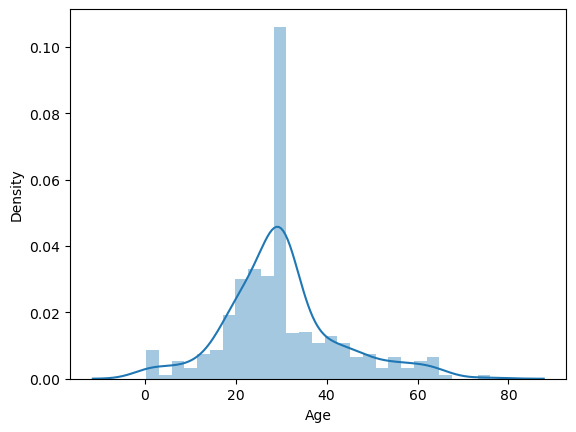

In [26]:
#check the distribution plotting of Age feature
sns.distplot(X_train['Age'])

<Axes: xlabel='Pclass', ylabel='count'>

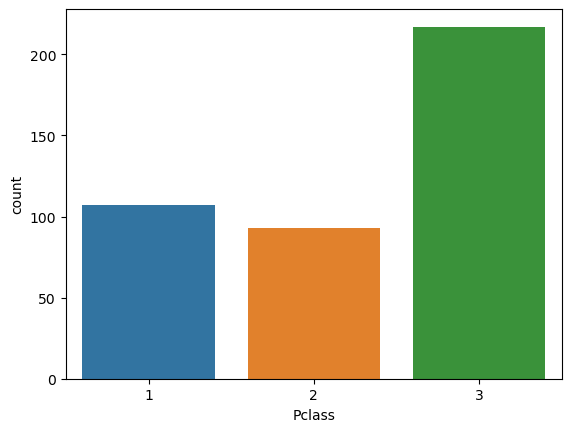

In [27]:
sns.countplot(x='Pclass',data=td)

<Axes: xlabel='Fare', ylabel='Density'>

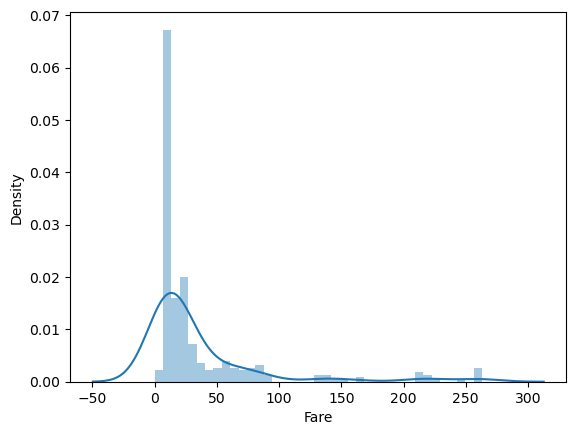

In [28]:
sns.distplot(X_train["Fare"])

In [29]:
#manual form
#we will perform Z-Scores normalization on both these Features
from sklearn.preprocessing import StandardScaler
age_scalar=StandardScaler()
age_scalar.fit(pd.DataFrame(X_train['Age']))

StandardScaler()

In [30]:
fare_scaler=StandardScaler()
fare_scaler.fit(pd.DataFrame(X_train['Fare']))

StandardScaler()

In [31]:
#Transform of data
X_train[['Age']]=age_scalar.transform(X_train[['Age']])
X_train[['Fare']]=fare_scaler.transform(X_train[['Fare']])

In [32]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
287,1,male,-0.490143,1,0,0.884721,S
387,2,male,2.151036,0,0,-0.428107,S
210,3,male,0.150143,0,0,-0.247577,S
93,3,male,0.011888,0,0,-0.521925,S
285,3,male,0.470286,0,0,-0.537088,S


<Axes: xlabel='Age', ylabel='Density'>

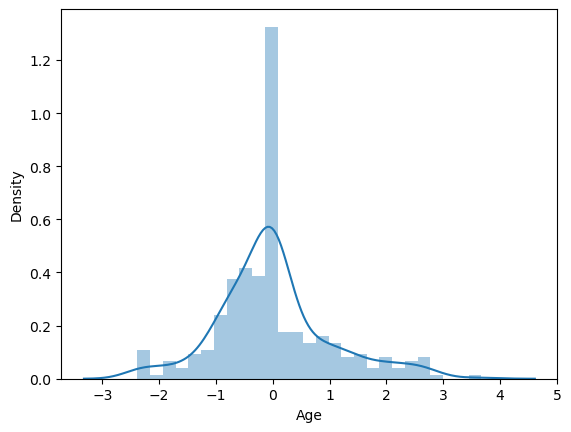

In [33]:
sns.distplot(X_train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

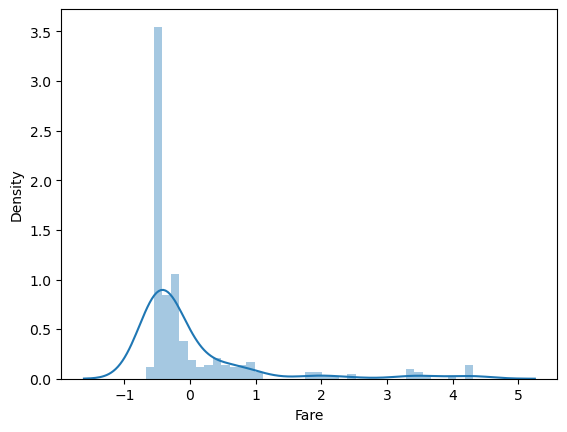

In [34]:
sns.distplot(X_train['Fare'])

In [35]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
287,1,male,-0.490143,1,0,0.884721,S
387,2,male,2.151036,0,0,-0.428107,S
210,3,male,0.150143,0,0,-0.247577,S
93,3,male,0.011888,0,0,-0.521925,S
285,3,male,0.470286,0,0,-0.537088,S


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
sex_encoder=LabelEncoder()
sex_encoder.fit(pd.DataFrame(X_train['Sex']))

LabelEncoder()

In [38]:
X_train['Sex']=sex_encoder.transform(X_train['Sex'])

In [39]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
287,1,1,-0.490143,1,0,0.884721,S
387,2,1,2.151036,0,0,-0.428107,S
210,3,1,0.150143,0,0,-0.247577,S
93,3,1,0.011888,0,0,-0.521925,S
285,3,1,0.470286,0,0,-0.537088,S


In [40]:
X_train['Embarked'].value_counts()

S    217
C     81
Q     35
Name: Embarked, dtype: int64

In [41]:
Embarked_encoder=LabelEncoder()
Embarked_encoder.fit(pd.DataFrame(X_train['Embarked']))

LabelEncoder()

In [42]:
X_train['Embarked']=Embarked_encoder.transform(X_train['Embarked'])

In [43]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
287,1,1,-0.490143,1,0,0.884721,2
387,2,1,2.151036,0,0,-0.428107,2
210,3,1,0.150143,0,0,-0.247577,2
93,3,1,0.011888,0,0,-0.521925,2
285,3,1,0.470286,0,0,-0.537088,2


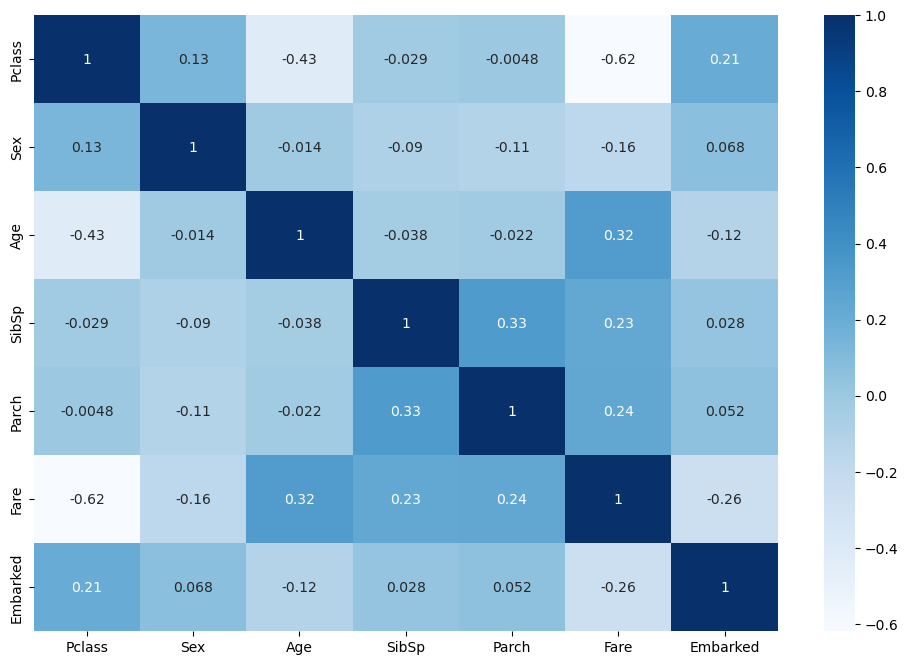

In [44]:
fig=plt.figure(figsize=(12,8))
fig.add_subplot(1,1,1)
sns.heatmap(X_train.corr(),cmap='Blues',annot=True)
plt.show()

## Fare and Pclass has high correlation in logistic regression features so remove the Pclass

In [45]:
del X_train['Pclass']

In [46]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked
287,1,-0.490143,1,0,0.884721,2
387,1,2.151036,0,0,-0.428107,2
210,1,0.150143,0,0,-0.247577,2
93,1,0.011888,0,0,-0.521925,2
285,1,0.470286,0,0,-0.537088,2


In [47]:
X_train_orginal=X_train.copy()
X_train=X_train.values
Y_train=Y_train.values

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train,Y_train)

LogisticRegression()

In [50]:
coefficients=pd.concat([pd.DataFrame(X_train_orginal.columns),
                pd.DataFrame(np.transpose(logistic_model.coef_))],axis=1)

In [51]:
coefficients.columns=["Features","coefficient"]

In [52]:
coefficients

,Features,coefficient
0,Sex,-6.324787
1,Age,-0.030503
2,SibSp,0.045724
3,Parch,0.076399
4,Fare,0.135028
5,Embarked,-0.050011


In [53]:
coefficients=coefficients.append({'Features':"Intercept",
                                 'coefficient':logistic_model.intercept_[0]},ignore_index=True)

In [54]:
coefficients

,Features,coefficient
0,Sex,-6.324787
1,Age,-0.030503
2,SibSp,0.045724
3,Parch,0.076399
4,Fare,0.135028
5,Embarked,-0.050011
6,Intercept,2.858144


### make a transform function for the X_test data

In [55]:
def transform_test_data(test_data,sex_encoder,age_scalar,fare_scaler,Embarked_encoder):
    test_data['Sex']=sex_encoder.transform(test_data['Sex'])
    test_data[['Age']]=age_scalar.transform(test_data[['Age']])
    test_data[['Fare']]=fare_scaler.transform(test_data[['Fare']])
    test_data['Embarked']=Embarked_encoder.transform(test_data['Embarked'])
    del test_data['Pclass']
    return test_data

In [56]:
X_test=transform_test_data(X_test,sex_encoder,
                           age_scalar,fare_scaler,Embarked_encoder)

In [57]:
X_test.head()

,Sex,Age,SibSp,Parch,Fare,Embarked
153,0,0.470286,0,2,-0.443586,2
398,1,-0.650214,0,0,-0.527137,2
412,0,-0.170000,0,0,-0.527137,2
94,1,-0.410107,0,0,-0.181715,0
70,0,-0.490143,0,0,-0.527611,1


In [58]:
X_test=X_test.values
Y_test=Y_test.values

In [59]:
Y_pred=logistic_model.predict(X_test)

In [60]:
Y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(Y_test,Y_pred)

array([[50,  0],
       [ 0, 34]], dtype=int64)

In [63]:
y_perfect_prediction=Y_test

In [64]:
confusion_matrix(Y_test,y_perfect_prediction)

array([[50,  0],
       [ 0, 34]], dtype=int64)

In [65]:
from sklearn.metrics import precision_score,recall_score

In [66]:
print(precision_score(Y_test,Y_pred))
print(recall_score(Y_test,Y_pred))

1.0
1.0


In [67]:
from sklearn.metrics import classification_report 

In [68]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [69]:
from sklearn.metrics import f1_score

In [70]:
print(f1_score(Y_test,Y_pred))

1.0


In [71]:
from sklearn.metrics import accuracy_score

In [72]:
print(accuracy_score(Y_test,Y_pred))

1.0


In [73]:
import scikitplot as skplt

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

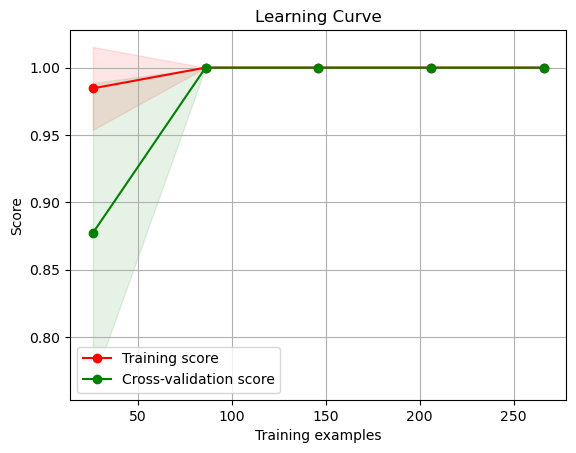

In [74]:
skplt.estimators.plot_learning_curve(logistic_model,X_train,Y_train)

In [75]:
Y_pred_prob=logistic_model.predict_proba(X_test)

In [76]:
from sklearn.metrics import roc_auc_score
#ROC Curve
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))

1.0


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

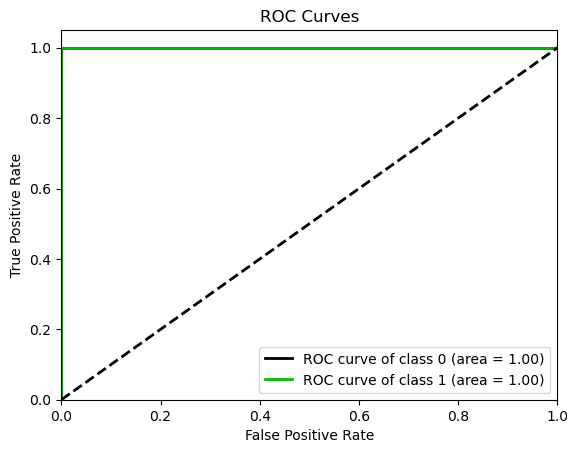

In [77]:
model_result["Logistic_model (L2)"]=roc_auc_score(Y_test,class_1_prob)
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

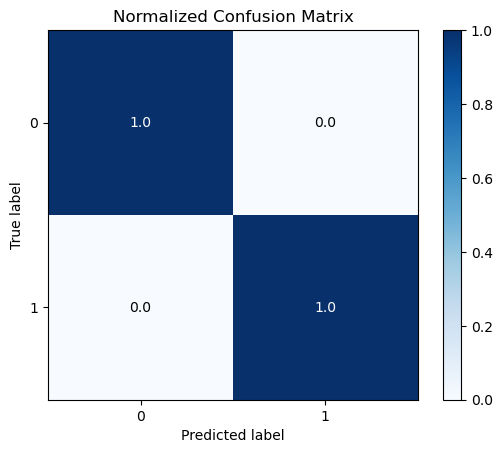

In [78]:
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,normalize=True)

In [79]:
from sklearn import tree

In [80]:
len(X_train)

333

In [81]:
decision_tree=tree.DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [82]:
Y_pred=decision_tree.predict(X_test)
Y_pred_prob=decision_tree.predict_proba(X_test)
print(accuracy_score(Y_test,Y_pred))

1.0


<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

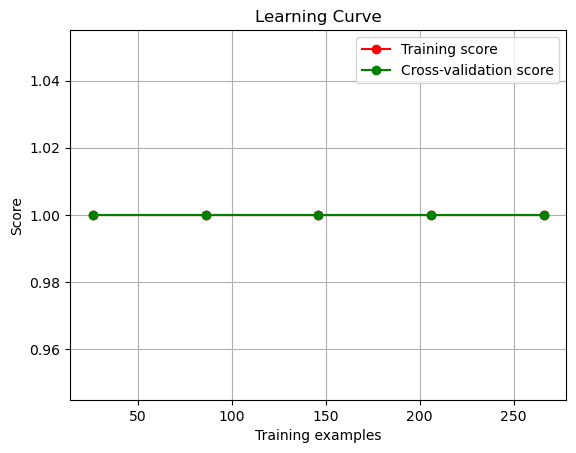

In [83]:
#plotting the learning curve in the case decision tree
skplt.estimators.plot_learning_curve(decision_tree,X_train,Y_train)

In [84]:
Y_pred__prob=decision_tree.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))

1.0


In [85]:
#model result of decision tree
model_result['Decision_tree']=roc_auc_score(Y_test,class_1_prob)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

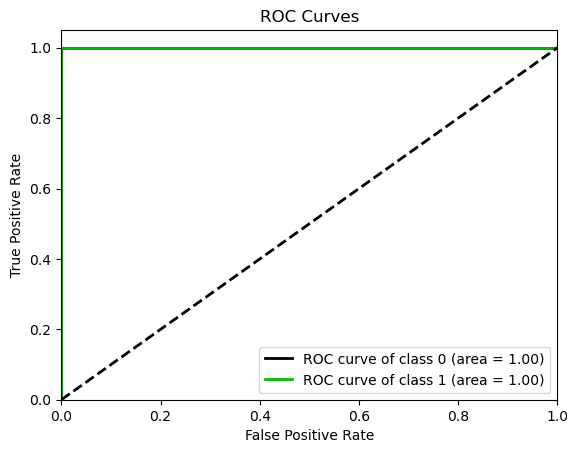

In [86]:
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])

In [87]:
decision_tree_4=tree.DecisionTreeClassifier(max_depth=4)
decision_tree_4.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [88]:
Y_pred=decision_tree_4.predict(X_test)
Y_pred_prob=decision_tree_4.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

1.0


<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

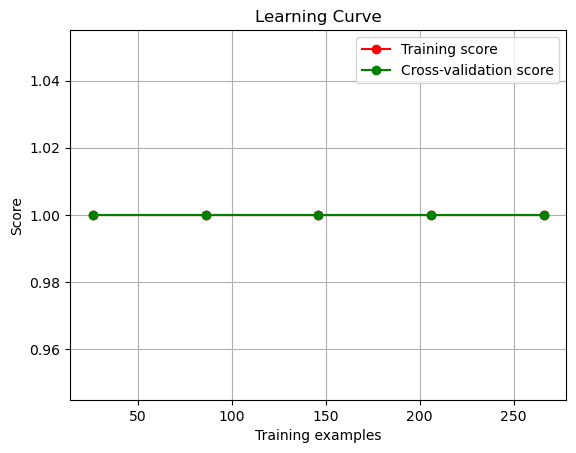

In [89]:
skplt.estimators.plot_learning_curve(decision_tree_4,X_train,Y_train)

### this is our desirable result,lets check confusion matrix also

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

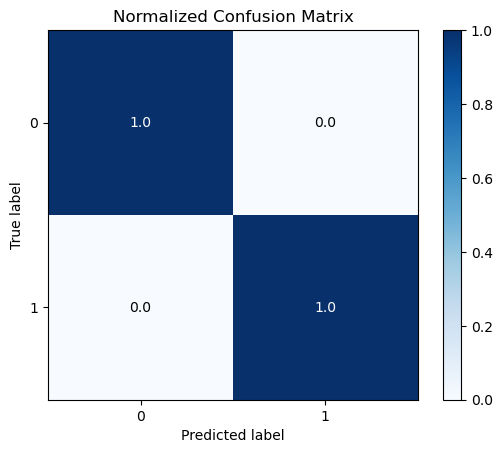

In [90]:
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,normalize=True)

In [91]:
Y_pred_prob=decision_tree_4.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))

1.0


In [92]:
model_result['Decision_tree_4']=roc_auc_score(Y_test,class_1_prob)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

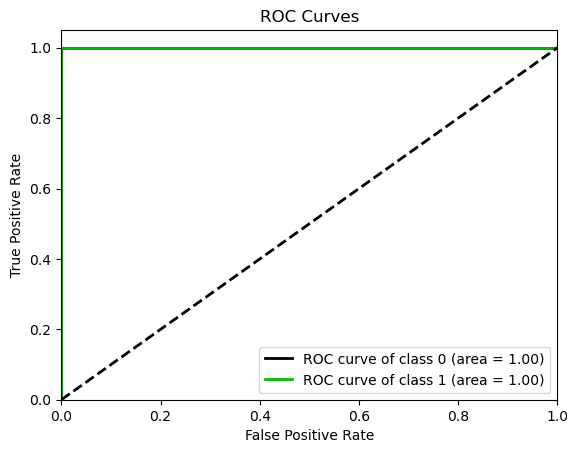

In [93]:
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
#building of the random forest on the same dataset
random_forest=RandomForestClassifier()
random_forest.fit(X_train,Y_train)

RandomForestClassifier()

In [96]:
Y_pred=random_forest.predict(X_test)
Y_pred_prob=decision_tree.predict_proba(X_test)
print(accuracy_score(Y_test,Y_pred))

1.0


<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

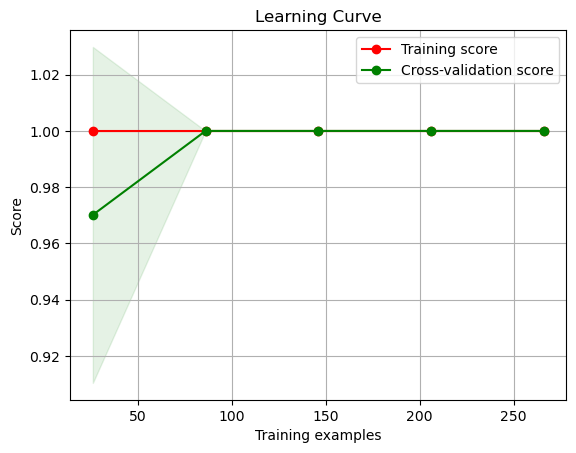

In [97]:
skplt.estimators.plot_learning_curve(random_forest,X_train,Y_train)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

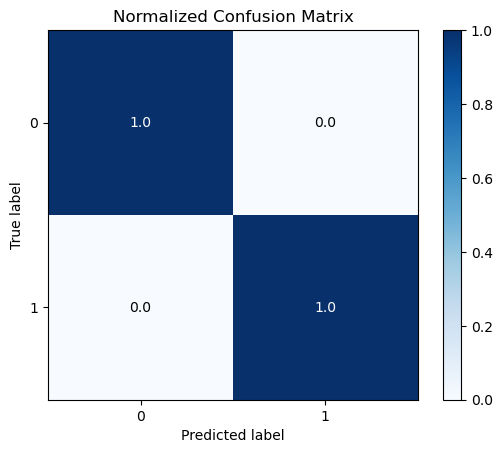

In [98]:
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,normalize=True)

In [99]:
Y_pred_prob=random_forest.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))

1.0


In [100]:
model_result['Random_forest(Default)']=roc_auc_score(Y_test,class_1_prob)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

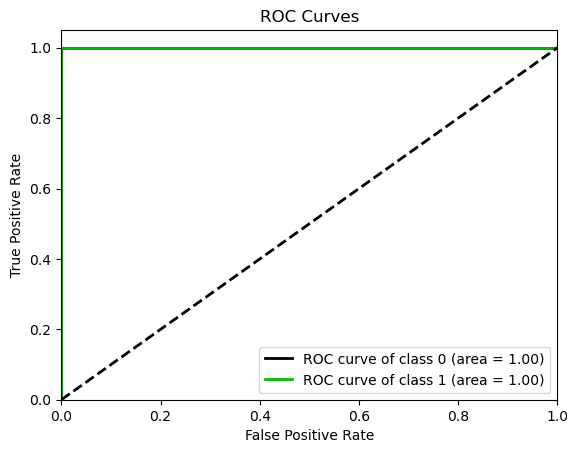

In [101]:
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])

## 
we used default parameter of random forest.we can change it and 
retrain the model.we will do three changes in ext model building 
max_depth=5 Each tree can go to depth 5
n_estimators=100 total 100 trees are build and average prediction taken 
max_features=3 features can be considered at one time

In [102]:
random_forest_5=RandomForestClassifier(max_depth=5,n_estimators=100,max_features=3)
random_forest_5.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, max_features=3)

In [103]:
Y_pred=random_forest_5.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

1.0


<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

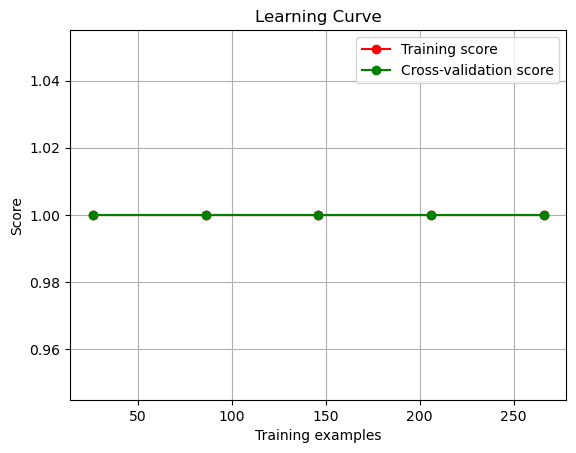

In [104]:
skplt.estimators.plot_learning_curve(random_forest_5,X_train,Y_train)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

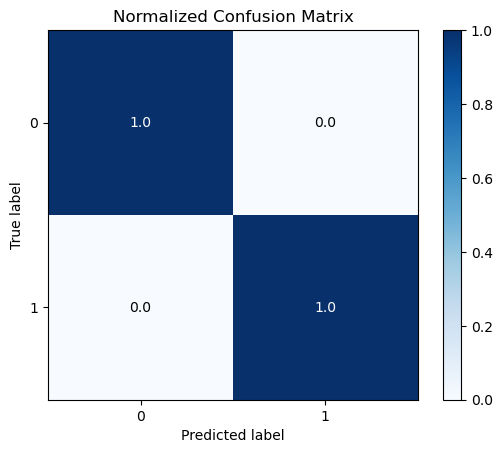

In [105]:
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,normalize=True)

In [106]:
Y_pred_prob=random_forest_5.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))

1.0


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

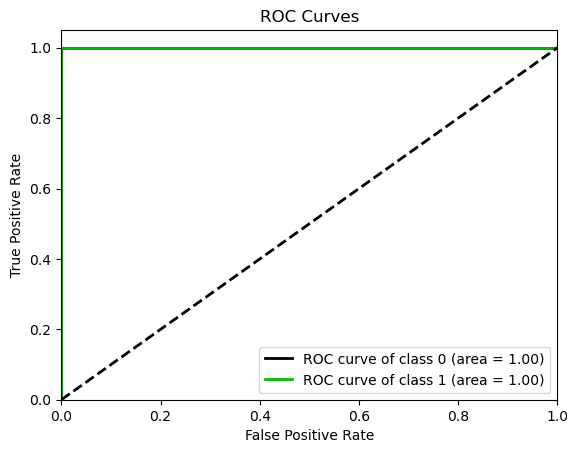

In [107]:
model_result["Random_forest_depth_5"]=roc_auc_score(Y_test,class_1_prob)
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves='each_class')

In [108]:
from sklearn.naive_bayes import GaussianNB

In [109]:
naive_bayes=GaussianNB()
naive_bayes.fit(X_train,Y_train)

GaussianNB()

In [110]:
Y_pred=naive_bayes.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

1.0


<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

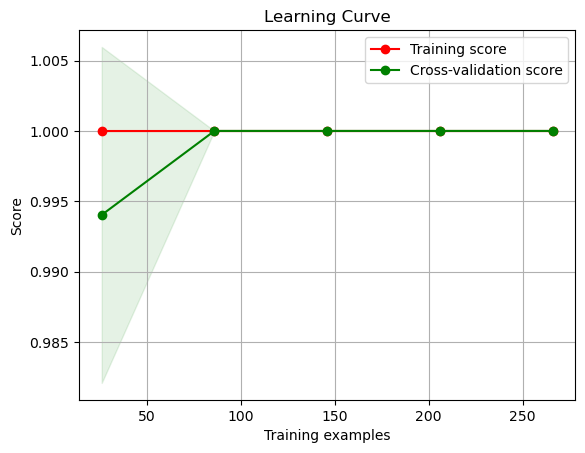

In [111]:
skplt.estimators.plot_learning_curve(naive_bayes,X_train,Y_train)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

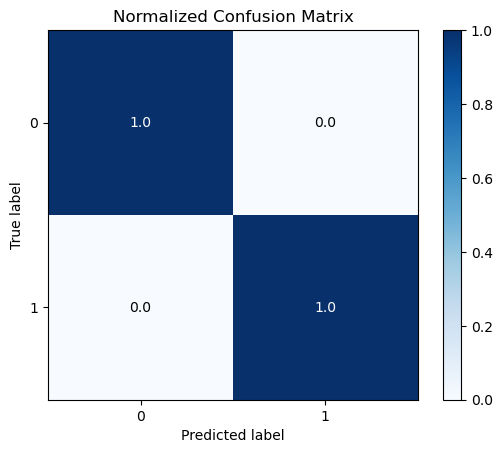

In [112]:
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,normalize=True)

In [113]:
Y_pred_prob=naive_bayes.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))

1.0


In [114]:
model_result["Naive_bayes_model"]=roc_auc_score(Y_test,class_1_prob)


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

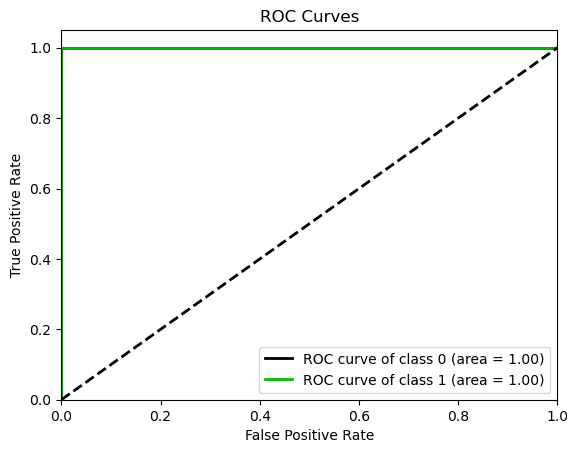

In [115]:
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves='each_class')

In [116]:
model_result

{'Logistic_model (L2)': 1.0,
 'Decision_tree': 1.0,
 'Decision_tree_4': 1.0,
 'Random_forest(Default)': 1.0,
 'Random_forest_depth_5': 1.0,
 'Naive_bayes_model': 1.0}

In [117]:
#to give different colors to barplot
#l1=(),,palette=(l1)

<Axes: >

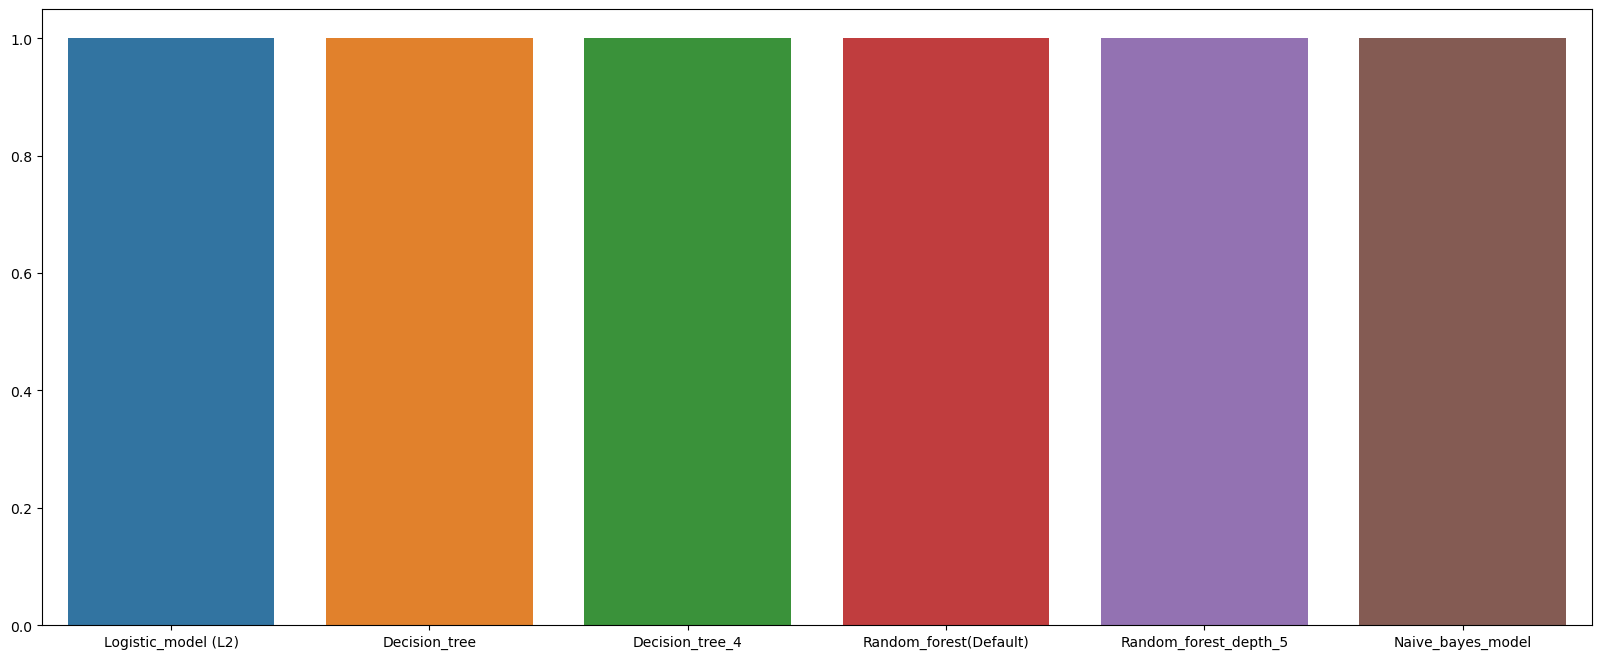

In [118]:
rcParams['figure.figsize']=20,8
sns.barplot(x=list(model_result.keys()),y=list(model_result.values()))